In [37]:
import os, sys

current = os.path.dirname(os.path.realpath('*.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# import MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms

In [40]:
# config

device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
device

device(type='mps')

In [41]:
# data loaders

train_dataset = datasets.MNIST(
    root='../data', download=True, train=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(
    root='../data', download=True, train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False)

In [42]:
def show_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

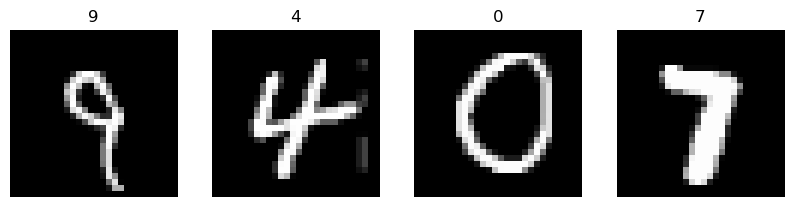

In [43]:
images, labels = next(iter(train_loader))
show_images(images, labels)

In [44]:
# all optimizers from scratch with the flexibility of modifying the gradient

In [45]:
class LinearNet(nn.Module):
    def __init__(self, in_features=784):
        super().__init__()
        self.fc = nn.Linear(in_features, 10)
        
    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x
    
model = LinearNet().to(device)


In [46]:
from dp import optim

lr = 1e-3

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [47]:
num_epochs = 4
num_batches = len(train_loader)
num_batches

469

In [48]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # move images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # logging
        if (i+1) % 1 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{num_batches}, Loss {loss:.4f}')

Epoch 1/4, Step 1/469, Loss 2.3538
Epoch 1/4, Step 2/469, Loss 2.3550
Epoch 1/4, Step 3/469, Loss 2.3286
Epoch 1/4, Step 4/469, Loss 2.3569
Epoch 1/4, Step 5/469, Loss 2.3052
Epoch 1/4, Step 6/469, Loss 2.3028
Epoch 1/4, Step 7/469, Loss 2.3281
Epoch 1/4, Step 8/469, Loss 2.3526
Epoch 1/4, Step 9/469, Loss 2.3388
Epoch 1/4, Step 10/469, Loss 2.3558
Epoch 1/4, Step 11/469, Loss 2.3321
Epoch 1/4, Step 12/469, Loss 2.3324
Epoch 1/4, Step 13/469, Loss 2.3164
Epoch 1/4, Step 14/469, Loss 2.3374
Epoch 1/4, Step 15/469, Loss 2.3555
Epoch 1/4, Step 16/469, Loss 2.3365
Epoch 1/4, Step 17/469, Loss 2.3156
Epoch 1/4, Step 18/469, Loss 2.3359
Epoch 1/4, Step 19/469, Loss 2.3538
Epoch 1/4, Step 20/469, Loss 2.3035
Epoch 1/4, Step 21/469, Loss 2.3501
Epoch 1/4, Step 22/469, Loss 2.3190
Epoch 1/4, Step 23/469, Loss 2.2908
Epoch 1/4, Step 24/469, Loss 2.2882
Epoch 1/4, Step 25/469, Loss 2.3345
Epoch 1/4, Step 26/469, Loss 2.3071
Epoch 1/4, Step 27/469, Loss 2.2993
Epoch 1/4, Step 28/469, Loss 2.2974
E